Vectorizing...

Training Naive Bayes...
NB Training Time: 0.18s
NB Accuracy: 81.69%

Training Logistic Regression (this takes ~30s)...
LR Training Time: 36.13s
LR Accuracy: 83.24%

Generating Plot...


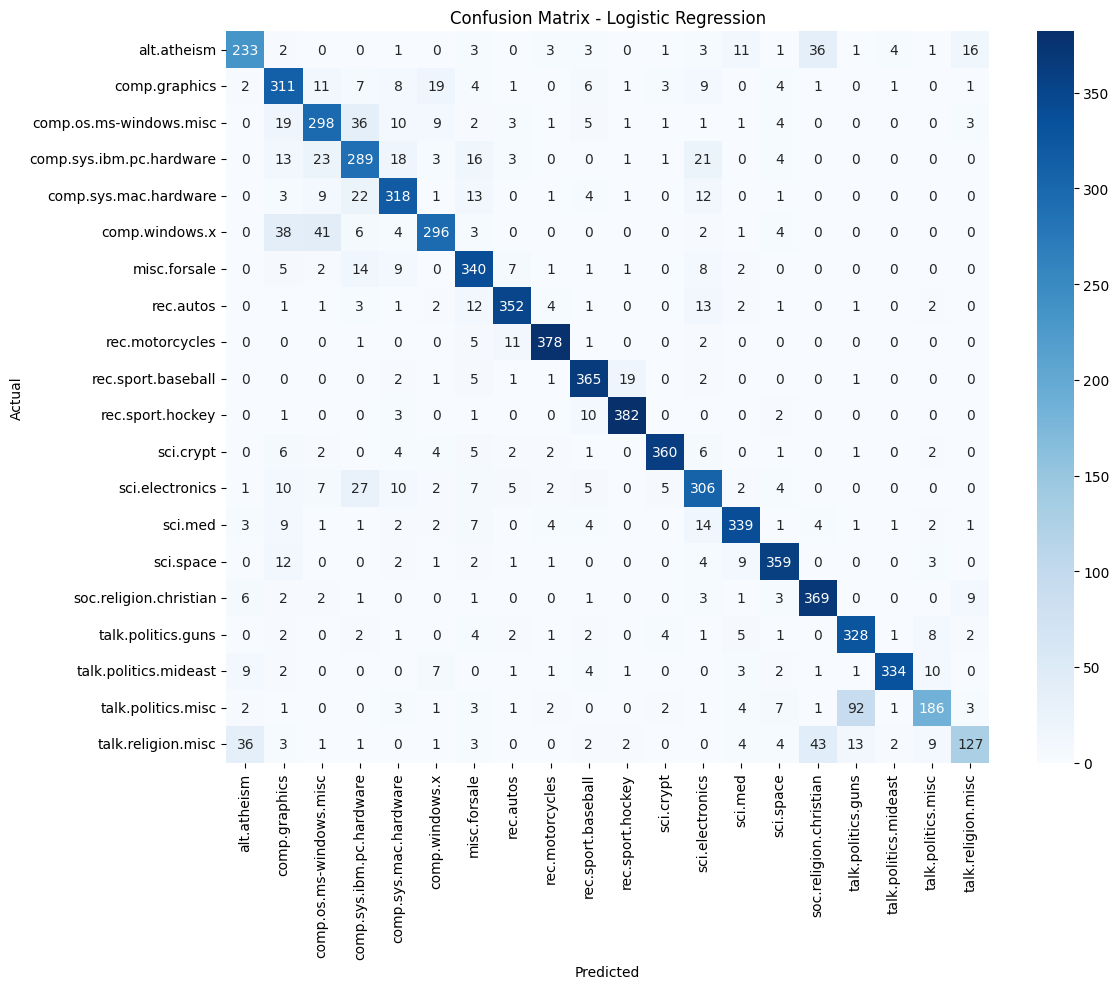

In [1]:
# CS 725 Project Code
# Team: Pamanji Nagaraju, Harshit Singh Bhomawat, Avi Chourasiya, Sumit Kumar, Ketan Patil

import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Data
print("Downloading dataset...")
train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

# 2. Preprocessing (TF-IDF)
print("Vectorizing...")
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data.data)
X_test = vectorizer.transform(test_data.data)
y_train, y_test = train_data.target, test_data.target

# 3. Train Naive Bayes
print("\nTraining Naive Bayes...")
nb = MultinomialNB(alpha=1.0)
start = time.time()
nb.fit(X_train, y_train)
print(f"NB Training Time: {time.time()-start:.2f}s")
nb_acc = accuracy_score(y_test, nb.predict(X_test))
print(f"NB Accuracy: {nb_acc*100:.2f}%")

# 4. Train Logistic Regression
print("\nTraining Logistic Regression (this takes ~30s)...")
lr = LogisticRegression(max_iter=1000, random_state=42)
start = time.time()
lr.fit(X_train, y_train)
print(f"LR Training Time: {time.time()-start:.2f}s")
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"LR Accuracy: {lr_acc*100:.2f}%")

# 5. Generate Confusion Matrix
print("\nGenerating Plot...")
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.target_names,
            yticklabels=test_data.target_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()

# Save the image specifically for GitHub
plt.savefig("confusion_matrix.png")
plt.show()